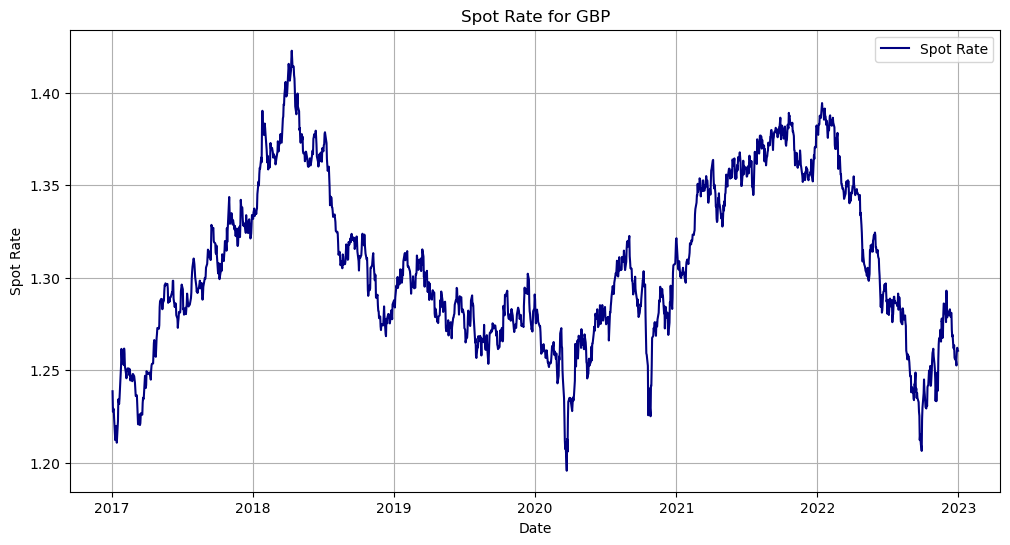

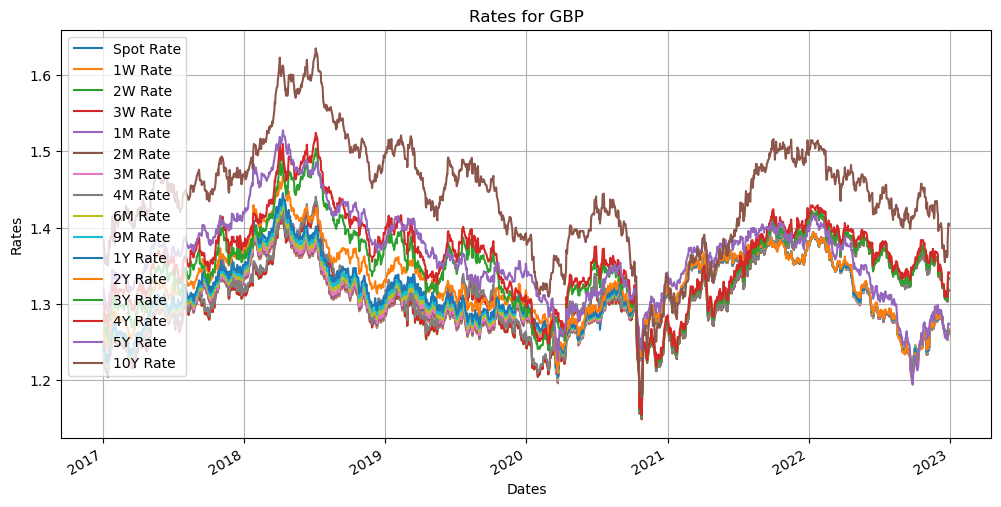

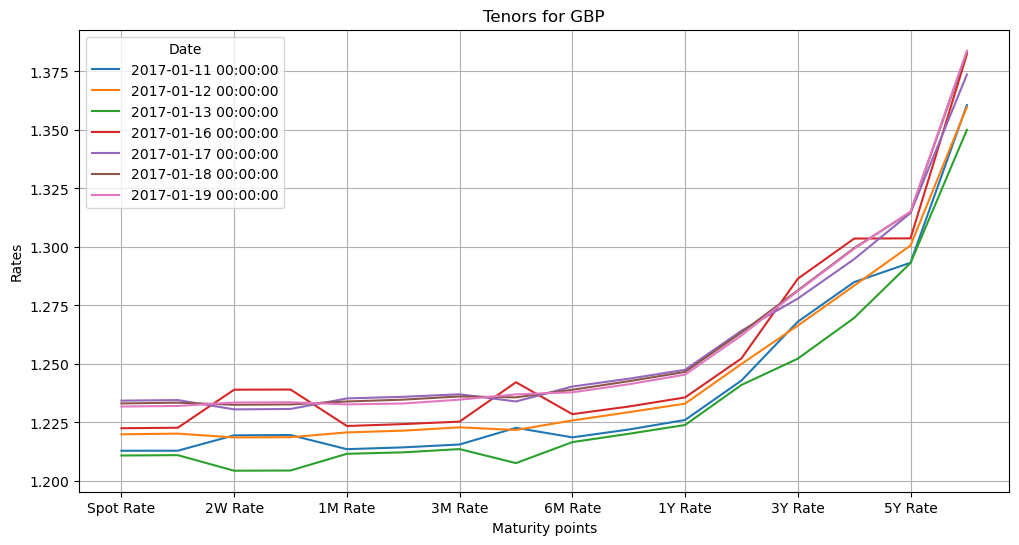

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('fx tenor curves 1st dataset.txt') # I'm using the smaller of the two data sets here 
#I've added the missing 'index' header for the first column
#I can upload that text file if it helps


currencyOfInterest = 'GBP'
dataOI = df[df['Currency']==currencyOfInterest] #This selects all rows and columns where the value in the currency column is
                                                #the one were looking for


#SPOT RATE GRAPH PREP
dates = pd.to_datetime(dataOI['Date'])
spotRates = dataOI['Spot Rate']


#SPOT RATE GRAPH
plt.figure(figsize=(12, 6))
plt.plot(dates, spotRates, label='Spot Rate', color='navy')
plt.xlabel('Date')
plt.ylabel('Spot Rate')
plt.legend()
plt.title(f'Spot Rate for {currencyOfInterest}')
plt.grid()
plt.show()

#ALL RATES PLOT PREP
allRates = dataOI.iloc[:,4:20]                  #This means it takes in all the rows that correspond to the columns to do with rates 
allRatesWTime = allRates
allRatesWTime['Date'] = dates                   #in making the previous part I remove all the dates so I readd them here
allRatesWTime = allRatesWTime.set_index('Date') #Then by making them the index plotting becomes very easy



allRatesWTime.plot(legend=True, figsize = (12, 6))
plt.xlabel('Dates')
plt.ylabel('Rates')
plt.title(f'Rates for {currencyOfInterest}')
plt.grid()
plt.show()



weekOfInterest = allRatesWTime[7:14]      #I want to make the selection of specific weeks easier, not sure how to though.
weekOfInterest = weekOfInterest.T         #Also need a easy way to make the 1 year apart dates for the tenor plots

# .T just transposes the data getting which gets it into the correct format to plot the tenor curve.

weekOfInterest.plot(legend=True, figsize = (12, 6))
plt.xlabel('Maturity points')
plt.ylabel('Rates')
plt.title(f'Tenors for {currencyOfInterest}')
plt.grid()
plt.show()





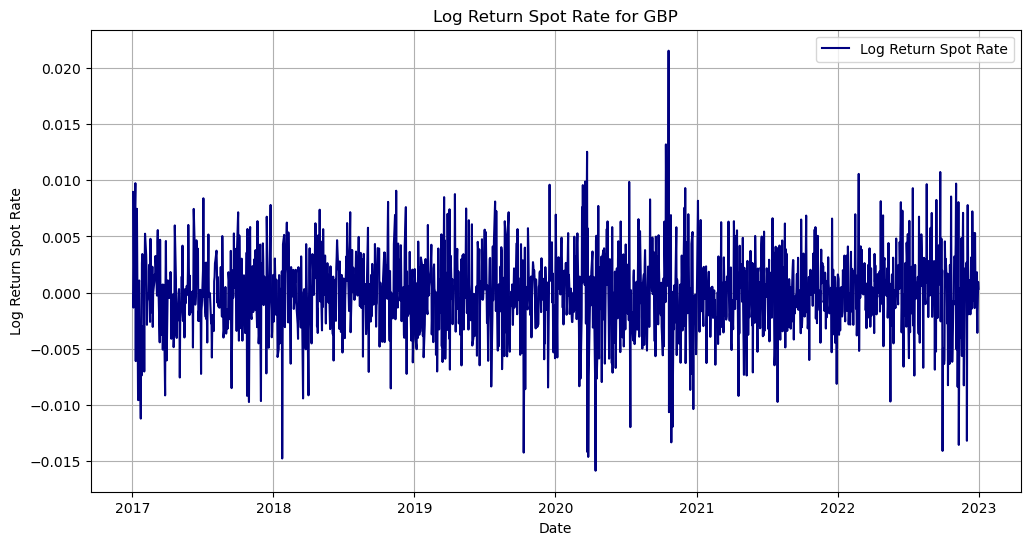

In [11]:
##Making the log return graphs return = ln(pt+1/pt)

dataOI
dates
spotRates

logReturnSR = np.log(spotRates.shift(1)/spotRates)



plt.figure(figsize=(12, 6))
plt.plot(dates, logReturnSR, label='Log Return Spot Rate', color='navy')
plt.xlabel('Date')
plt.ylabel('Log Return Spot Rate')
plt.legend()
plt.title(f'Log Return Spot Rate for {currencyOfInterest}')
plt.grid()
plt.show()


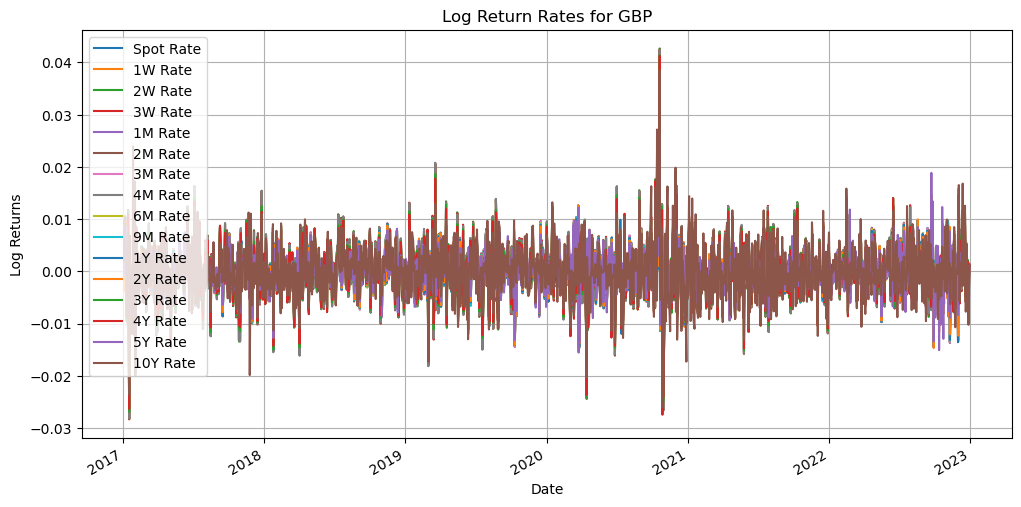

In [9]:
#log returns for all rates
allRatesWTime


allRatesLogReturns = allRatesWTime

allRatesLogReturns = np.log(allRatesLogReturns.shift(1)/allRatesLogReturns)


allRatesLogReturns.plot(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.title(f'Log Return Rates for {currencyOfInterest}')
plt.grid()
plt.show()

